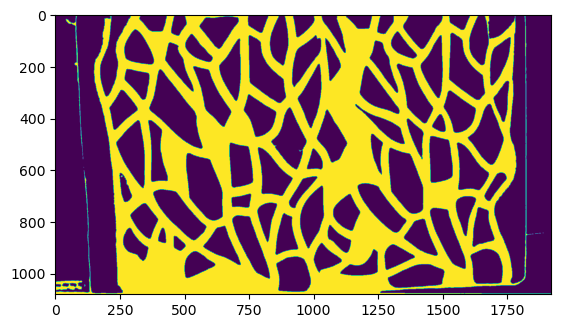

In [66]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("./Data/Datasets/RigidModelVideo-11-21/11-21-1-clip2/frame0001_mask.png")
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)

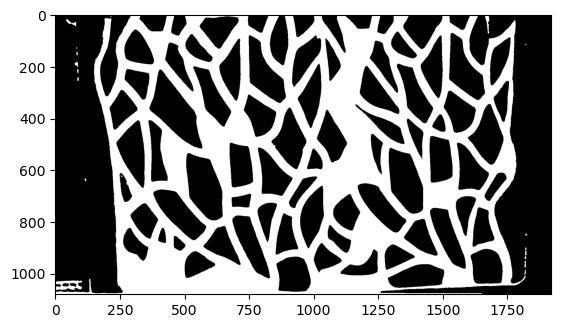

In [67]:
refined = cv2.morphologyEx(image, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3)), iterations=2)
plt.imshow(refined, cmap='gray')    

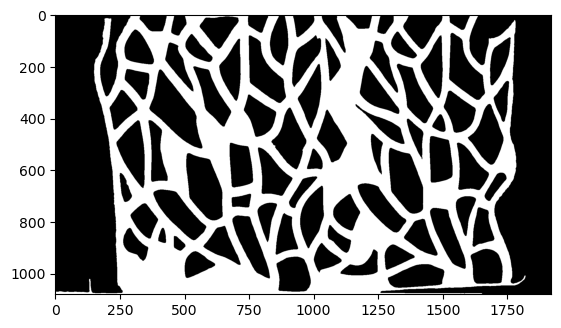

In [68]:
_, labeled, stats, _ = cv2.connectedComponentsWithStats(refined)
max_label = np.argsort(stats[:,4])[-2]
plt.imshow(labeled==max_label, cmap='gray')

In [69]:
color_mapped = cv2.cvtColor((labeled==max_label).astype(np.uint8), cv2.COLOR_GRAY2RGBA)
color_mapped.shape

(1080, 1920, 4)

array([  0,   0, 255,  50], dtype=uint8)

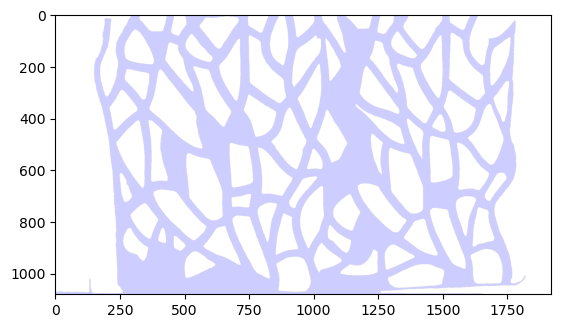

In [70]:
color_mapped = np.zeros_like(color_mapped)

color_mapped[labeled==max_label] = [0, 0, 255, 50]

plt.imshow(color_mapped)
cv2.imwrite("./Data/Datasets/RigidModelVideo-11-21/11-21-1-clip2/frame0001_mask_overlay.png", color_mapped)
color_mapped[1000,400]


In [75]:
wrote = cv2.imread("./Data/Datasets/RigidModelVideo-11-21/11-21-1-clip2/frame0001_mask_overlay.png", cv2.IMREAD_UNCHANGED)
wrote[0,400]

array([0, 0, 0, 0], dtype=uint8)